Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\29861\AppData\Local\Temp\jieba.cache
Loading model cost 0.684 seconds.
Prefix dict has been built successfully.


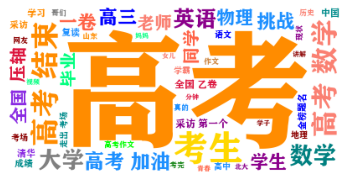

In [1]:
#-*- codeing = utf-8 -*- 

"""
    对全部标题数据的词云图

"""

# 导入工具包
import  jieba                               #分词（将一个句子分成很多个词语）
from matplotlib import pyplot as plt        #绘图，数据可视化，点状图、柱状图等科学绘图，和echarts不同，不是直接用于网站，而是生成图片
from wordcloud import WordCloud             #词云，形成有遮罩效果的
from PIL import Image               #用来做图像处理的（官方默认）
import numpy as np                  #矩阵运算
from matplotlib import colors       # 用于颜色数组的建立

# 1. 读取数据
import pandas as pd
data = pd.read_excel('../01_data_get/Data-总（最新）.xlsx',header=0)
# print(data.shape[0])    #数量
# print(data.head())            #数据内容,只打印了头部的前4个信息


# 2. 分词
#词云是按照词来进行统计的，这个使用jieba自动进行词频统计
text = ''.join(data['标题'])        #此处将所有的标题进行了整合连成一个字符串
# print(text)
#cut = jieba.cut(text)   #将一个字符串进行分割
words = list(jieba.cut(text))
ex_sw_words = []
#下方是对目前的一些字符串进行筛选，将一些没有意义的词语进行清除
stop_words = [x.strip() for x in open('stopwords.txt', encoding="utf-8")]
for word in words:
    if len(word) > 1 and (word not in stop_words):
        ex_sw_words.append(word)
string = ' '.join(ex_sw_words)         #此处将其对象cut变成字符串，可在下方显示，#' '.join(cut)  以指定字符串空格‘ ’作为分隔符，将 cut 中所有的元素(的字符串表示)合并为一个新的字符串

# 3.词云图可视化

# 遮罩图片
# img = Image.open(r'遮罩.jpg')   #打开遮罩图片
# img_arry = np.array(img)        #将图片转换为数组，有了数组即可做词云的封装了



#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']

#调用
colormap=colors.ListedColormap(color_list)

# 词云图的属性设置
wc = WordCloud(
    background_color='white',   #背景必须是白色
    # mask = img_arry,            #传入遮罩的图片，必须是数组
    font_path = "方正粗黑宋简体.ttf",  #设置字体，（字体如何找，可以在C:/windows/Fonts中找到名字）
    colormap=colormap,  # 设置文字颜色
    max_font_size=150,  # 设置字体最大值
    random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方案
    max_words=50        # 设置上限多少个词 
)
# 词云图的文本来源
wc.generate_from_text(string)         #从哪个文本生成wc,这个文本必须是切好的词

#绘制图片
fig = plt.figure(1)             #1表示第一个位置绘制
plt.imshow(wc)                  #按照wc词云的规格显示
plt.axis('off')                 #是否显示坐标轴，不显示（单一图片）
# plt.show()                      #显示生成的词云图片
plt.savefig(r'词云-总（最新）.jpg',dpi=800)      #输出词云图片到文件,默认清晰度是400，这里设置500可能有点高,注意此处要保存，show()方法就得注释

